In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from dateutil.parser import *

%matplotlib inline

In [3]:
#read data
nycbike = pd.read_csv('nyc_bikeshare.csv')
rideshare = pd.read_csv('nyc_rideshare.csv')
green = pd.read_csv('nyc_green_taxi.csv')
yellow = pd.read_csv('nyc_yellow_taxi.csv')
mta = pd.read_csv('mta.csv')
demo = pd.read_csv('demographics.csv')
weather = pd.read_csv('weather.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Following cells are examining data

In [6]:
nycbike.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,2059,06-01-13 00:00:44,06-01-13 00:35:03,406.0,406.0,19599,0.0,NaN,0
1,1521,06-01-13 00:01:22,06-01-13 00:26:43,2008.0,310.0,15567,1.0,1983.0,1
2,2028,06-01-13 00:01:47,06-01-13 00:35:35,485.0,406.0,18445,0.0,NaN,0
3,1829,06-01-13 00:03:47,06-01-13 00:34:16,265.0,436.0,15234,1.0,1984.0,1
4,899,06-01-13 00:09:25,06-01-13 00:24:24,494.0,494.0,15539,1.0,1967.0,1


In [7]:
rideshare.head()

,provider,pickup_datetime,dropoff_datetime,pickup_location_id,dropoff_location_id,shared_ride
0,1,01-13-15 17:49:59,NaN,137.0,NaN,NaN
1,1,01-20-15 19:44:50,NaN,163.0,NaN,NaN
2,1,01-10-15 17:47:07,NaN,161.0,NaN,NaN
3,1,01-05-15 21:39:19,NaN,263.0,NaN,NaN
4,1,01-17-15 17:36:12,NaN,112.0,NaN,NaN


In [8]:
green.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount,trip_type
0,08-25-13 03:04:20,08-25-13 03:08:40,5,1.21,-73.915627,40.757450,-73.914749,40.744560,NaN,NaN,7.00,NaN
1,08-30-13 23:43:49,08-31-13 00:09:25,4,4.70,-73.997772,40.683205,-73.951752,40.689156,NaN,NaN,26.25,NaN
2,08-24-13 14:20:06,08-24-13 14:33:07,1,3.54,-73.857964,40.834431,-73.890465,40.858604,NaN,NaN,14.00,NaN
3,08-26-13 12:04:02,08-26-13 12:04:10,5,0.00,-73.902092,40.764004,-73.902061,40.763992,NaN,NaN,0.00,NaN
4,08-22-13 00:20:45,08-22-13 00:34:36,6,2.73,-73.954346,40.730366,-73.925476,40.698238,NaN,NaN,12.50,NaN


In [9]:
yellow.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount
0,06-29-13 08:19:47,06-29-13 08:28:17,2,1.70,-73.995376,40.739316,-74.000997,40.721095,NaN,NaN,10.0
1,06-06-13 14:17:18,06-06-13 14:44:42,1,2.30,-73.977356,40.754204,-74.002716,40.734031,NaN,NaN,18.0
2,06-29-13 20:46:00,06-29-13 20:59:00,2,4.58,-73.966770,40.804120,-73.991645,40.758342,NaN,NaN,17.0
3,06-25-13 09:50:00,06-25-13 10:09:00,1,2.84,-73.960547,40.760512,-73.991325,40.751655,NaN,NaN,18.5
4,06-29-13 08:42:00,06-29-13 08:52:00,1,2.63,-74.004345,40.707710,-73.997462,40.736542,NaN,NaN,11.0


In [0]:
mta.head()

In [0]:
demo.head()

In [88]:
weather.tail()

,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,...,MonthlyGreatestSnowDepthDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinimumTemperature,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,Sunrise,Sunset
81389,12/31/19 11:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81390,12/31/19 12:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81391,12/31/19 13:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81392,12/31/19 14:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81393,12/31/19 15:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Parsing date and time values

In [10]:
nycbike['start'] = pd.to_datetime(nycbike['starttime'], format='%m-%d-%y %H:%M:%S', errors='ignore')
nycbike['stop'] = pd.to_datetime(nycbike['stoptime'], format='%m-%d-%y %H:%M:%S', errors='ignore')

In [11]:
nycbike.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,start,stop
0,2059,06-01-13 00:00:44,06-01-13 00:35:03,406.0,406.0,19599,0.0,NaN,0,2013-06-01 00:00:44,2013-06-01 00:35:03
1,1521,06-01-13 00:01:22,06-01-13 00:26:43,2008.0,310.0,15567,1.0,1983.0,1,2013-06-01 00:01:22,2013-06-01 00:26:43
2,2028,06-01-13 00:01:47,06-01-13 00:35:35,485.0,406.0,18445,0.0,NaN,0,2013-06-01 00:01:47,2013-06-01 00:35:35
3,1829,06-01-13 00:03:47,06-01-13 00:34:16,265.0,436.0,15234,1.0,1984.0,1,2013-06-01 00:03:47,2013-06-01 00:34:16
4,899,06-01-13 00:09:25,06-01-13 00:24:24,494.0,494.0,15539,1.0,1967.0,1,2013-06-01 00:09:25,2013-06-01 00:24:24


# Seperate into male and female

In [14]:
bikemale = nycbike[nycbike['gender'] == 1]
bikefemale = nycbike[nycbike['gender'] == 2]
bikemale.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,start,stop
1,1521,06-01-13 00:01:22,06-01-13 00:26:43,2008.0,310.0,15567,1.0,1983.0,1,2013-06-01 00:01:22,2013-06-01 00:26:43
3,1829,06-01-13 00:03:47,06-01-13 00:34:16,265.0,436.0,15234,1.0,1984.0,1,2013-06-01 00:03:47,2013-06-01 00:34:16
4,899,06-01-13 00:09:25,06-01-13 00:24:24,494.0,494.0,15539,1.0,1967.0,1,2013-06-01 00:09:25,2013-06-01 00:24:24
5,395,06-01-13 00:11:52,06-01-13 00:18:27,312.0,410.0,19477,1.0,1970.0,1,2013-06-01 00:11:52,2013-06-01 00:18:27
6,424,06-01-13 00:11:53,06-01-13 00:18:57,494.0,519.0,18489,1.0,1957.0,1,2013-06-01 00:11:53,2013-06-01 00:18:57


# Try to see the trend

In [16]:
maledate = bikemale.groupby(bikemale['start'].dt.date).gender.count()
femaledate = bikefemale.groupby(bikefemale['start'].dt.date).gender.count()
maletime = bikemale.groupby(bikemale['start'].dt.hour).gender.count()
femaletime = bikefemale.groupby(bikefemale['start'].dt.hour).gender.count()
maledate.head()

start
2013-06-01    1149
2013-06-02    1246
2013-06-03    1216
2013-06-04    2146
2013-06-05    2171
Name: gender, dtype: int64

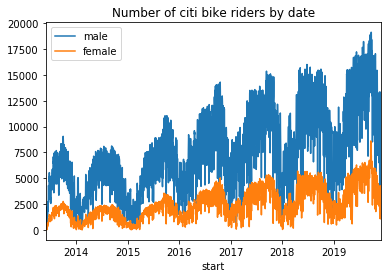

In [23]:
plt.figure()
maledate.plot()
femaledate.plot()
plt.title('Number of citi bike riders by date')
plt.legend(['male', 'female'])
plt.show()

In [27]:
maledate.to_csv('maledate.csv')
femaledate.to_csv('femaledate.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


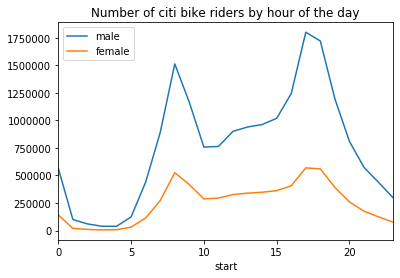

In [25]:
plt.figure()
maletime.plot()
femaletime.plot()
plt.title('Number of citi bike riders by hour of the day')
plt.legend(['male', 'female'])
plt.show()

In [39]:
#concat rideshares, taxis
allride = pd.concat([rideshare['pickup_datetime'], green['pickup_datetime'], yellow['pickup_datetime']], names=['pickup_datetime'])
#allride.columns = ["pickup_datetime"]
#allride['datetime'] = pd.to_datetime(allride['pickup_datetime'], format='%m-%d-%y %H:%M:%S', errors='ignore')
allride.head()

0    01-13-15 17:49:59
1    01-20-15 19:44:50
2    01-10-15 17:47:07
3    01-05-15 21:39:19
4    01-17-15 17:36:12
Name: pickup_datetime, dtype: object

In [41]:
ride = allride.to_frame()
ride.head()

,pickup_datetime
0,01-13-15 17:49:59
1,01-20-15 19:44:50
2,01-10-15 17:47:07
3,01-05-15 21:39:19
4,01-17-15 17:36:12


In [42]:
ride['dt'] = pd.to_datetime(ride['pickup_datetime'], format='%m-%d-%y %H:%M:%S', errors='ignore')
ride.head()

,pickup_datetime,dt
0,01-13-15 17:49:59,2015-01-13 17:49:59
1,01-20-15 19:44:50,2015-01-20 19:44:50
2,01-10-15 17:47:07,2015-01-10 17:47:07
3,01-05-15 21:39:19,2015-01-05 21:39:19
4,01-17-15 17:36:12,2015-01-17 17:36:12


In [45]:
ridedate = ride.groupby(ride['dt'].dt.date).count()
ridedate.head()

,pickup_datetime,dt
dt,,
2008-12-31,8,8
2009-01-01,18,18
2010-09-23,10,10
2013-06-01,5392,5392
2013-06-02,4438,4438


<Figure size 432x288 with 0 Axes>

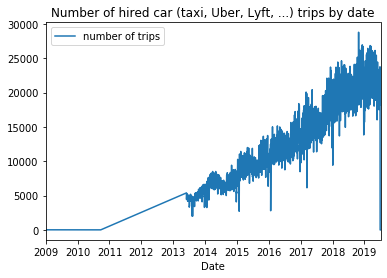

In [50]:
plt.figure()
ridedate.plot(y='dt')
plt.title('Number of hired car (taxi, Uber, Lyft, ...) trips by date')
plt.legend(['number of trips'])
plt.xlabel('Date')
plt.show()

In [51]:
ridedate.to_csv('ridedate.csv')

In [52]:
ride.to_csv('ride.csv')

In [53]:
ridehour = ride.groupby(ride['dt'].dt.hour).count()
ridehour.head()

,pickup_datetime,dt
dt,,
0,1116299,1116299
1,801397,801397
2,571275,571275
3,424909,424909
4,368218,368218


<Figure size 432x288 with 0 Axes>

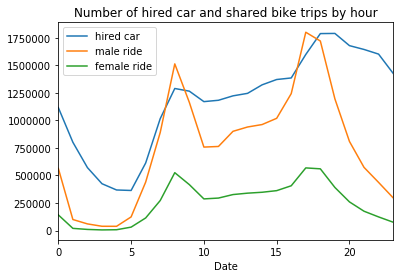

In [55]:
plt.figure()
ridehour.plot(y='dt')
maletime.plot()
femaletime.plot()
plt.title('Number of hired car and shared bike trips by hour')
plt.legend(['hired car', 'male ride', 'female ride'])
plt.xlabel('Date')
plt.show()

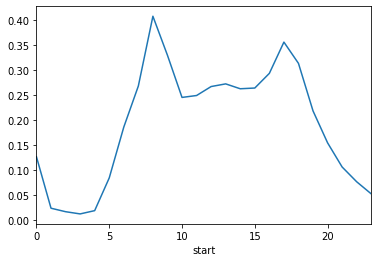

In [61]:
ftr = femaletime / ridehour['dt']

ftr.plot()

In [62]:
bike = nycbike.groupby(nycbike['start'].dt.date).count()
bike.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,start,stop
start,,,,,,,,,,,
2013-06-01,2607,2607,2607,2607,2512,2607,2607,1529,2607,2607,2607
2013-06-02,4920,4920,4920,4920,4759,4920,4920,1642,4920,4920,4920
2013-06-03,2478,2478,2478,2478,2390,2478,2478,1475,2478,2478,2478
2013-06-04,4883,4883,4883,4883,4716,4883,4883,2714,4883,4883,4883
2013-06-05,5013,5013,5013,5013,4861,5013,5013,2755,5013,5013,5013


In [63]:
bikevsride = pd.concat([bike, ridedate], axis=1, join='inner')
bikevsride.head()

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender,start,stop,pickup_datetime,dt
2013-06-01,2607,2607,2607,2607,2512,2607,2607,1529,2607,2607,2607,5392,5392
2013-06-02,4920,4920,4920,4920,4759,4920,4920,1642,4920,4920,4920,4438,4438
2013-06-03,2478,2478,2478,2478,2390,2478,2478,1475,2478,2478,2478,4459,4459
2013-06-04,4883,4883,4883,4883,4716,4883,4883,2714,4883,4883,4883,4744,4744
2013-06-05,5013,5013,5013,5013,4861,5013,5013,2755,5013,5013,5013,4895,4895


In [67]:
bikevsride['bike'] = bikevsride['stop'] / (bikevsride['dt'] + bikevsride['stop'])
bikevsride['ride'] = bikevsride['dt'] / (bikevsride['dt'] + bikevsride['stop'])
bvr = bikevsride[['bike', 'ride']]

bikevsride[['stop', 'dt']].corr(method ='pearson') 

,stop,dt
stop,1.000000,0.483741
dt,0.483741,1.000000


In [71]:
male = maledate.to_frame()
female = femaledate.to_frame()
bikevsride = pd.concat([male, female, ridedate], axis=1, join='inner')

In [73]:
bikevsride.columns = ['male', 'female', 'ride', 'dt']

In [80]:
bvr = bikevsride[['male', 'female', 'ride']]
bvr['total'] = bvr['male'] + bvr['female']
bvr['bikepct'] = bvr['total'] / (bvr['total'] + bvr['ride'])

bvr.corr(method='pearson')

,male,female,ride,total,bikepct
male,1.000000,0.963836,0.499073,0.997387,0.582497
female,0.963836,1.000000,0.526422,0.980570,0.532938
ride,0.499073,0.526422,1.000000,0.510075,-0.320144
total,0.997387,0.980570,0.510075,1.000000,0.573251
bikepct,0.582497,0.532938,-0.320144,0.573251,1.000000


<Figure size 2160x1152 with 0 Axes>

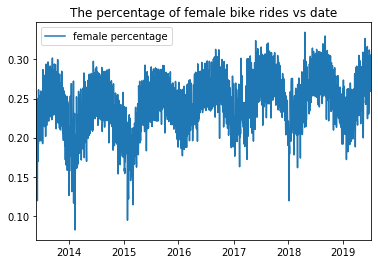

In [86]:
bvr['fepct'] = bvr['female'] / bvr['total']
plt.figure(figsize=(30, 16))
bvr.plot(y='fepct')
plt.legend(['female percentage'])
plt.title('The percentage of female bike rides vs date')
plt.show()

In [94]:
weather["odate"] = weather.DATE.apply(lambda x : x.split()[0])
weather["datetime"] = pd.to_datetime(weather['odate'], format='%m/%d/%y')
weather.head()

,DATE,REPORT_TYPE,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,...,MonthlyMinimumTemperature,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,Sunrise,Sunset,month,day,year,odate,datetime
0,1/1/13 0:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,13,1/1/13,2013-01-01
1,1/1/13 1:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,13,1/1/13,2013-01-01
2,1/1/13 2:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,13,1/1/13,2013-01-01
3,1/1/13 3:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,13,1/1/13,2013-01-01
4,1/1/13 4:51,FM-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,13,1/1/13,2013-01-01


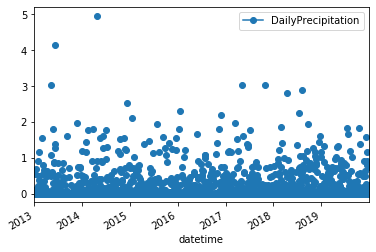

In [99]:
weather.plot(x='datetime', y='DailyPrecipitation', marker='o')

In [102]:
fm = pd.concat([maletime, femaletime], axis=1, join='inner')
fm.columns = ['male', 'female']

,male,female
start,,
0,564311,141814
1,99939,19622
2,60227,10026
3,38684,5577
4,38358,7238
5,123584,30878
6,439642,114186
7,890378,272427
8,1513091,525252


<Figure size 432x288 with 0 Axes>

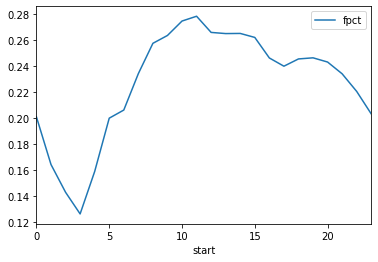

In [103]:
fm['fpct'] = fm['female'] / (fm['male'] + fm['female'])
plt.figure()
fm.plot(y = 'fpct')
plt.show()